In [1]:
pip install yfinance

In [2]:
## Libraries
import yfinance as yf
import pandas as pd

## Ticker Object
spy = yf.Ticker("SPY")

In [3]:
## Shows expiration dates for each option chain
spy.options

('2023-11-29',
 '2023-11-30',
 '2023-12-01',
 '2023-12-04',
 '2023-12-05',
 '2023-12-06',
 '2023-12-07',
 '2023-12-08',
 '2023-12-15',
 '2023-12-22',
 '2023-12-29',
 '2024-01-05',
 '2024-01-19',
 '2024-01-31',
 '2024-02-16',
 '2024-02-29',
 '2024-03-15',
 '2024-03-28',
 '2024-04-19',
 '2024-04-30',
 '2024-05-31',
 '2024-06-21',
 '2024-06-28',
 '2024-09-20',
 '2024-09-30',
 '2024-12-20',
 '2025-01-17',
 '2025-03-21',
 '2025-06-20',
 '2025-12-19',
 '2026-01-16')

In [4]:
## Creates an "Options" object from the ticker module
opt = spy.option_chain('2023-12-29')
## Pandas dataframe of the call contracts
opt.calls.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY231229C00270000,2023-11-27 15:16:43+00:00,270.0,185.70,0.00,0.00,0.0,0.0,1,63,0.00001,True,REGULAR,USD
1,SPY231229C00275000,2023-08-04 15:02:21+00:00,275.0,180.85,178.60,179.77,0.0,0.0,2,59,0.00001,True,REGULAR,USD
2,SPY231229C00280000,2023-11-21 18:55:40+00:00,280.0,174.57,0.00,0.00,0.0,0.0,10,57,0.00001,True,REGULAR,USD
3,SPY231229C00285000,2023-11-21 18:57:01+00:00,285.0,169.61,0.00,0.00,0.0,0.0,13,28,0.00001,True,REGULAR,USD
4,SPY231229C00290000,2023-08-21 18:16:03+00:00,290.0,152.98,151.89,153.09,0.0,0.0,3,16,0.00001,True,REGULAR,USD


In [5]:
## Pandas dataframe of the put contracts
opt.puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY231229P00270000,2023-11-28 20:45:22+00:00,270.0,0.01,0.0,0.0,0.0,0.0,81.0,4380,0.250007,False,REGULAR,USD
1,SPY231229P00275000,2023-11-28 14:43:14+00:00,275.0,0.02,0.0,0.0,0.0,0.0,1.0,3225,0.250007,False,REGULAR,USD
2,SPY231229P00280000,2023-11-28 20:49:12+00:00,280.0,0.01,0.0,0.0,0.0,0.0,14.0,2629,0.250007,False,REGULAR,USD
3,SPY231229P00285000,2023-11-28 21:14:47+00:00,285.0,0.02,0.0,0.0,0.0,0.0,40.0,3031,0.250007,False,REGULAR,USD
4,SPY231229P00290000,2023-11-27 14:41:28+00:00,290.0,0.03,0.0,0.0,0.0,0.0,20.0,3047,0.250007,False,REGULAR,USD


In [8]:
## Pull the total open interest and put-call ratios for each expiration date
exp_dates = list(spy.options)

total_contracts_opened = []
put_call_ratio = []

for i in exp_dates:
  calls = spy.option_chain(i).calls['openInterest'].sum()
  puts = spy.option_chain(i).puts['openInterest'].sum()
  ratio = puts / calls
  total_contracts_opened.append(calls + puts)
  put_call_ratio.append(ratio)

In [9]:
## Combine everything into a pandas dataframe
pc_ratio_df = pd.DataFrame({
    "Expire_Dates":exp_dates,
    "Contracts_Opened":total_contracts_opened,
    "PC_Ratio":put_call_ratio
})

## Puts the open interest in a more readable format (units are in millions now)
pc_ratio_df['Contracts_Opened'] = pc_ratio_df['Contracts_Opened'] / 1000000
pc_ratio_df = pc_ratio_df.set_index('Expire_Dates')

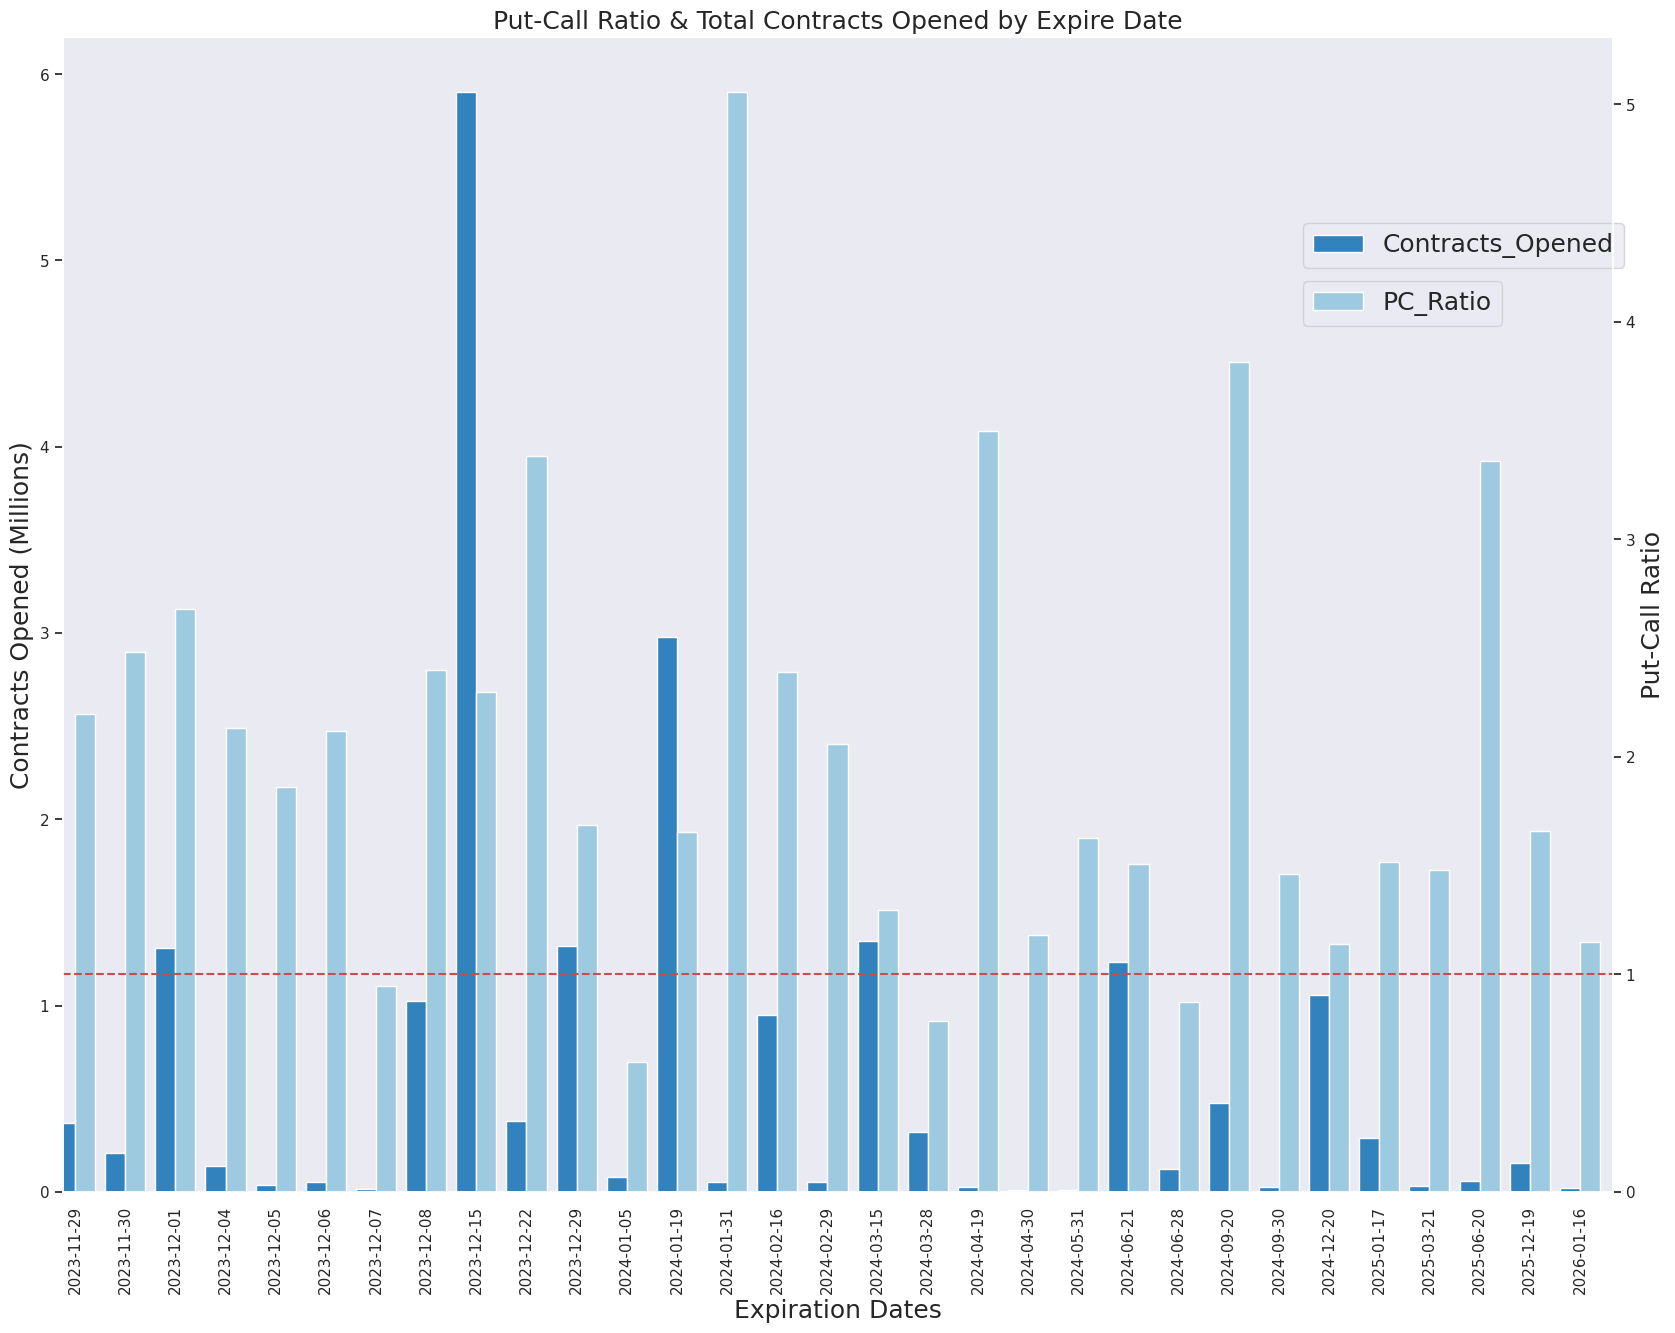

In [10]:
## Visualize the data!
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.set_palette("Paired")

fig = plt.figure(figsize=(20,15))
plt.rcParams.update({'font.size': 40})

ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.4

pc_ratio_df.Contracts_Opened.plot(
    kind='bar',
    color = '#3182bd',
    ax=ax,
    width=width,
    position=1)

pc_ratio_df.PC_Ratio.plot(
    kind='bar',
    color = '#9ecae1',
    ax=ax2,
    width=width,
    position=0)

ax.set_ylabel('Contracts Opened (Millions)',fontsize=18)
ax2.set_ylabel('Put-Call Ratio',fontsize=18)
ax2.axhline(y = 1, color = 'r', linestyle = 'dashed')
ax.set_xlabel('Expiration Dates',fontsize=18)


plt.title('Put-Call Ratio & Total Contracts Opened by Expire Date',fontsize=18)
ax.grid(False)
ax2.grid(False)

ax.legend(loc = (0.8,0.8),fontsize=18)
ax2.legend(loc = (0.8,0.75),fontsize=18)

plt.show()